In [1]:
!nvidia-smi

Wed Jun 11 09:58:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P0             28W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
!pip install python-multipart -q
!pip install FastAPI -q
!pip install uvicorn -q
!pip install kaleido -q
!pip install ultralytics -q
!pip install -q -U google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/15

In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.153 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6362.2/8062.4 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("dataset-lmrsw").project("compdetect")
dataset = project.version(23).download("yolov8")


/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you have google-auth 2.40.1 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incomp


Extracting Dataset Version Zip to CompDetect-23 in yolov8:: 100%|██████████| 1176/1176 [00:00<00:00, 9260.90it/s]


In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=100 imgsz=600 plots=True

/kaggle/working
100%|███████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 128MB/s]
Ultralytics 8.3.153 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/datasets/CompDetect-23/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=600, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=Fals

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml			 R_curve.png	      train_batch2.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1.jpg     val_batch1_pred.jpg
labels.jpg			 train_batch2430.jpg  val_batch2_labels.jpg
P_curve.png			 train_batch2431.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch2432.jpg  weights


/kaggle/working


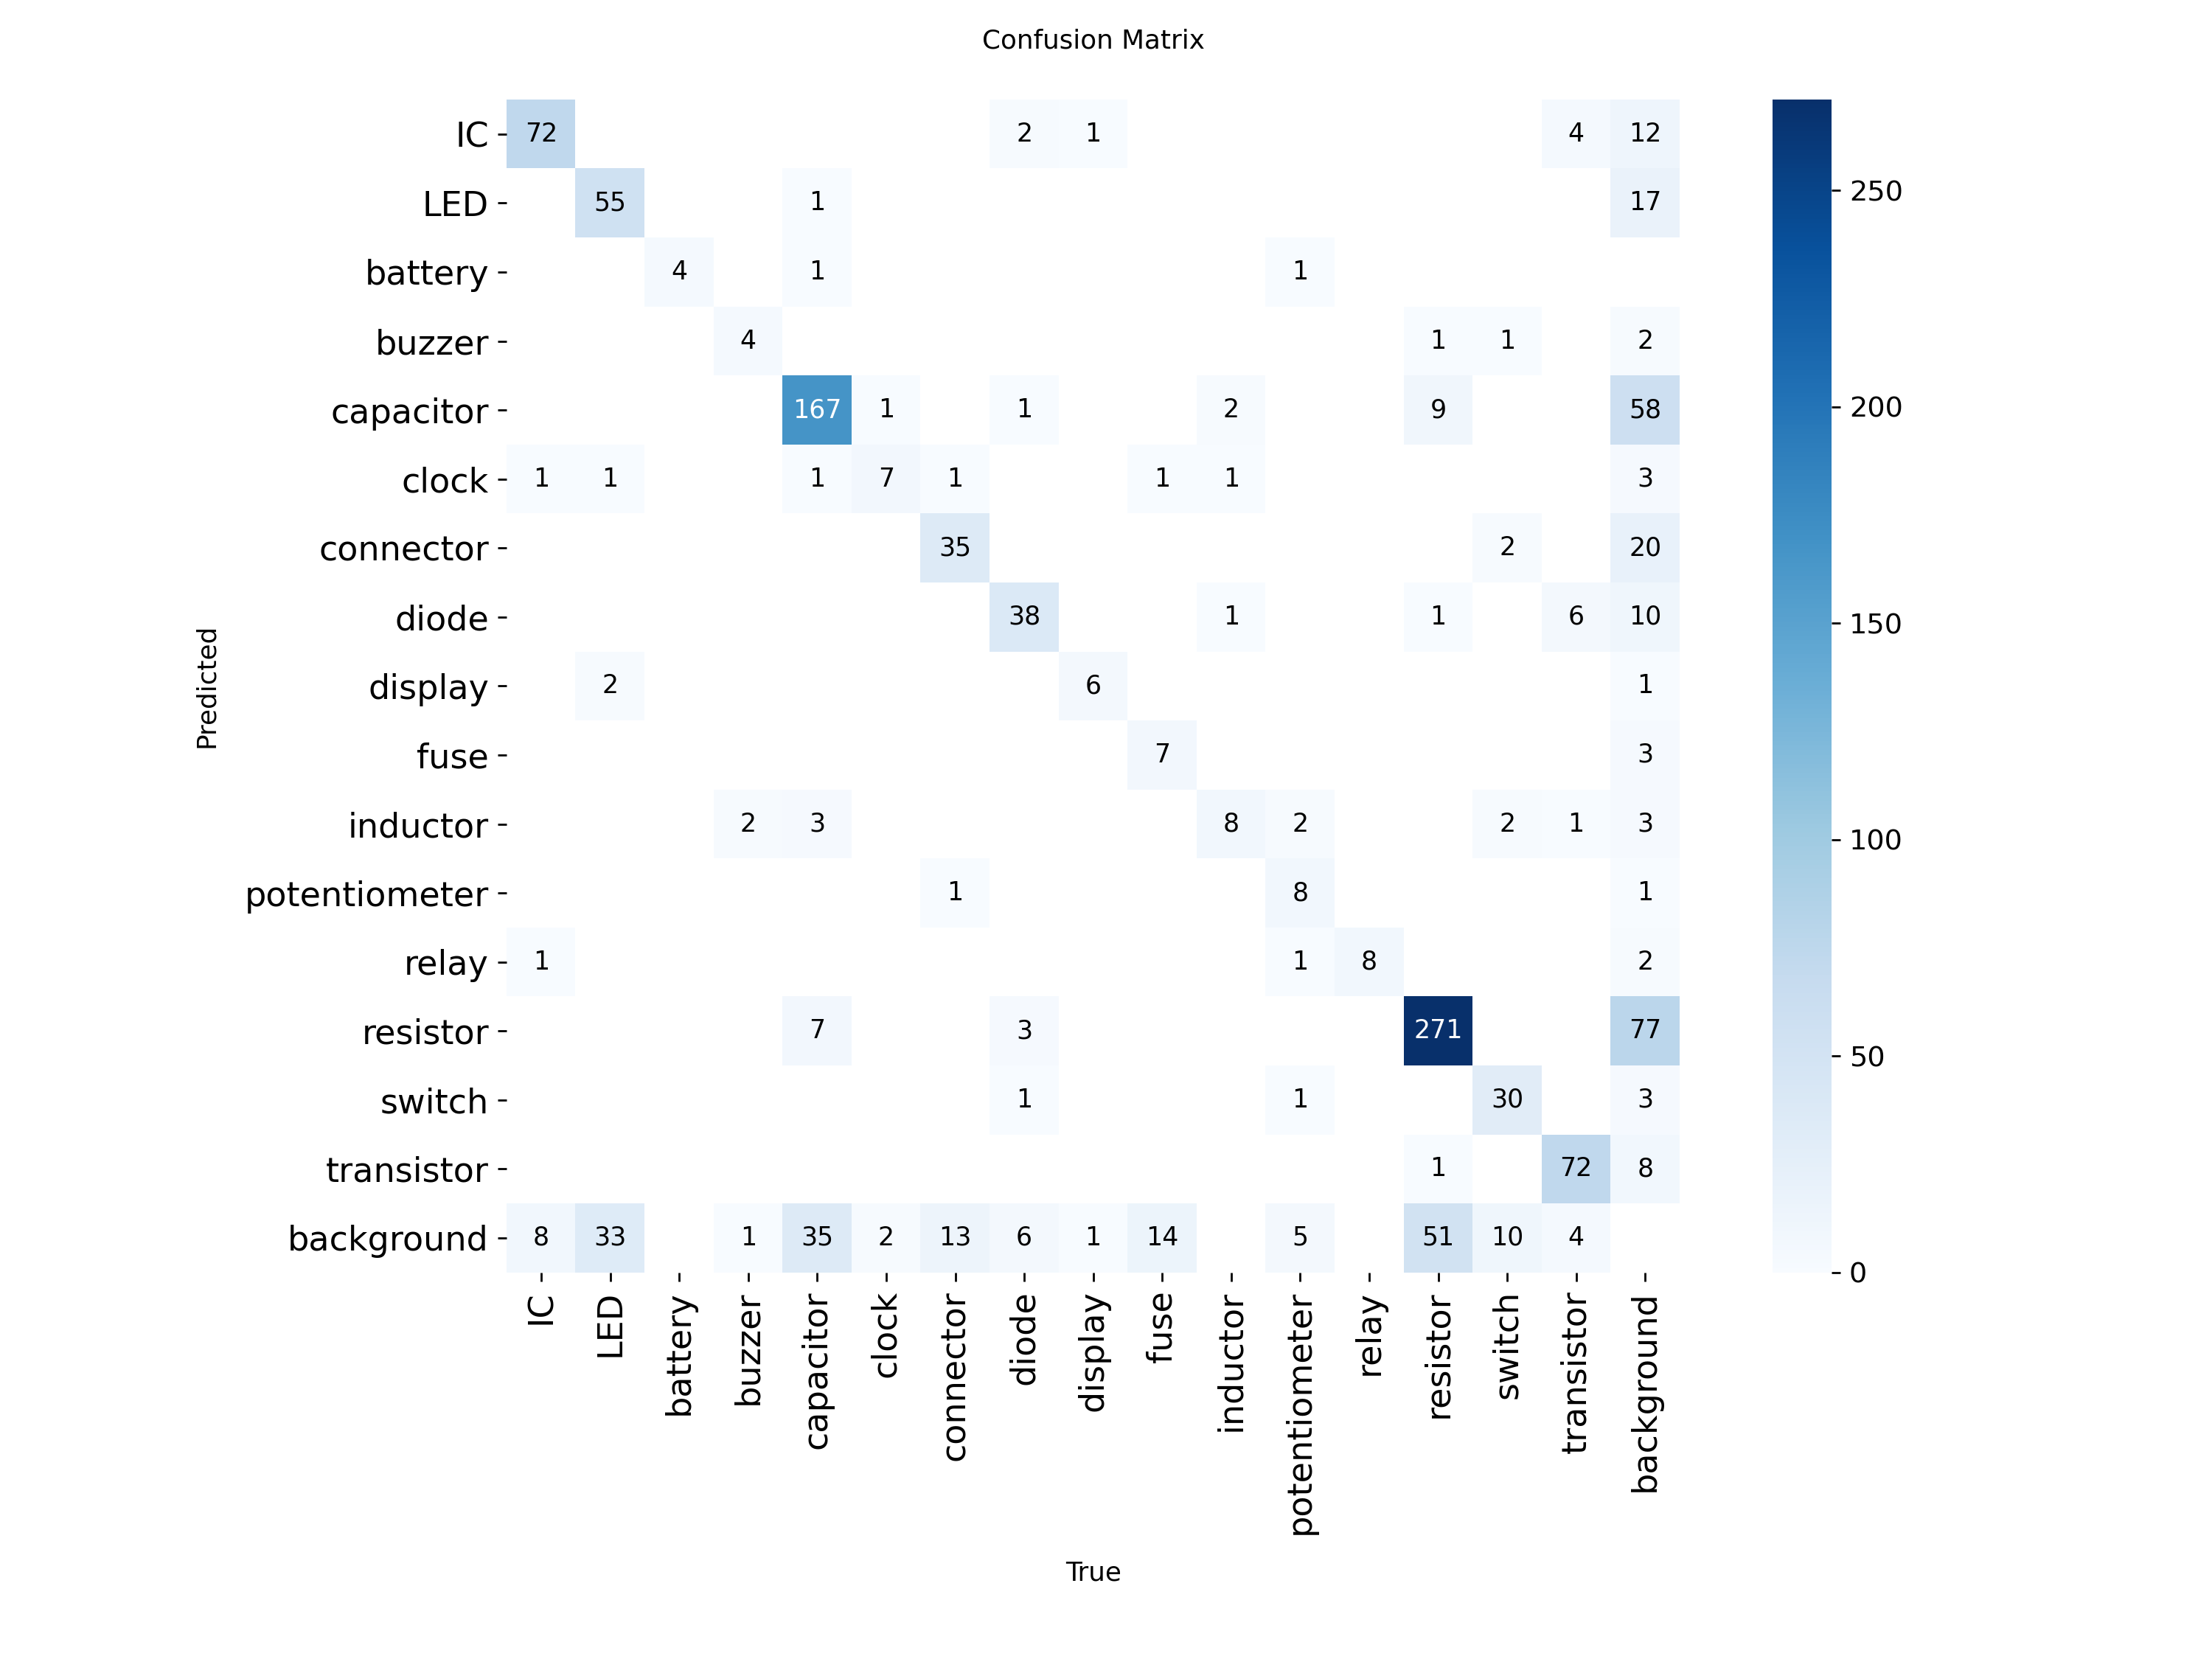

In [9]:
%cd {HOME}
Image(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


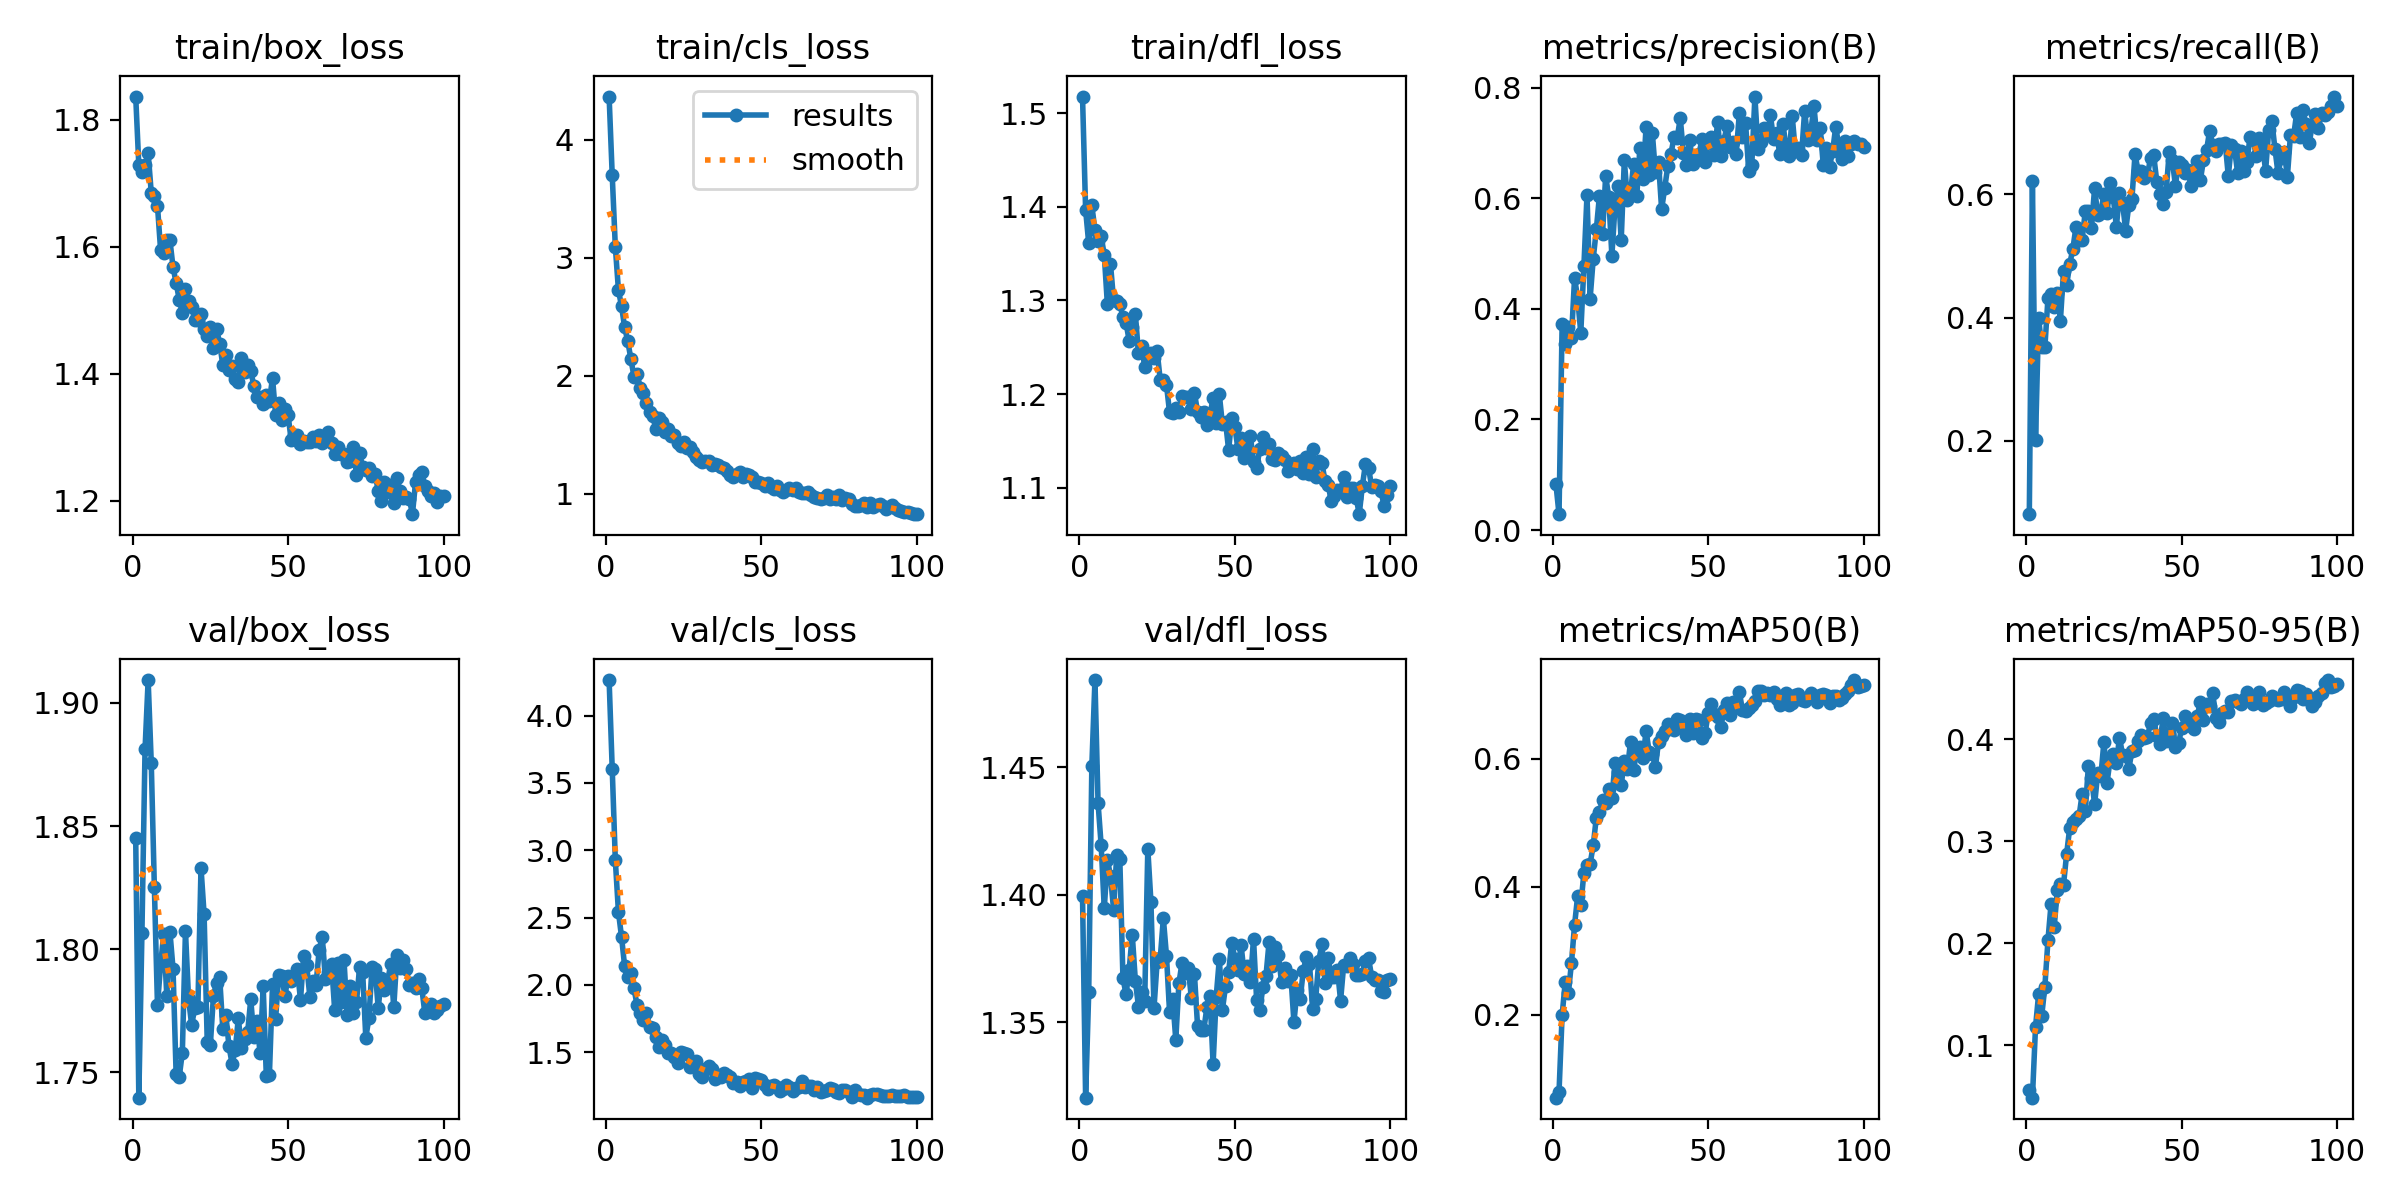

In [10]:
%cd {HOME}
Image(filename=f'/kaggle/working/runs/detect/train/results.png', width=600)

/kaggle/working


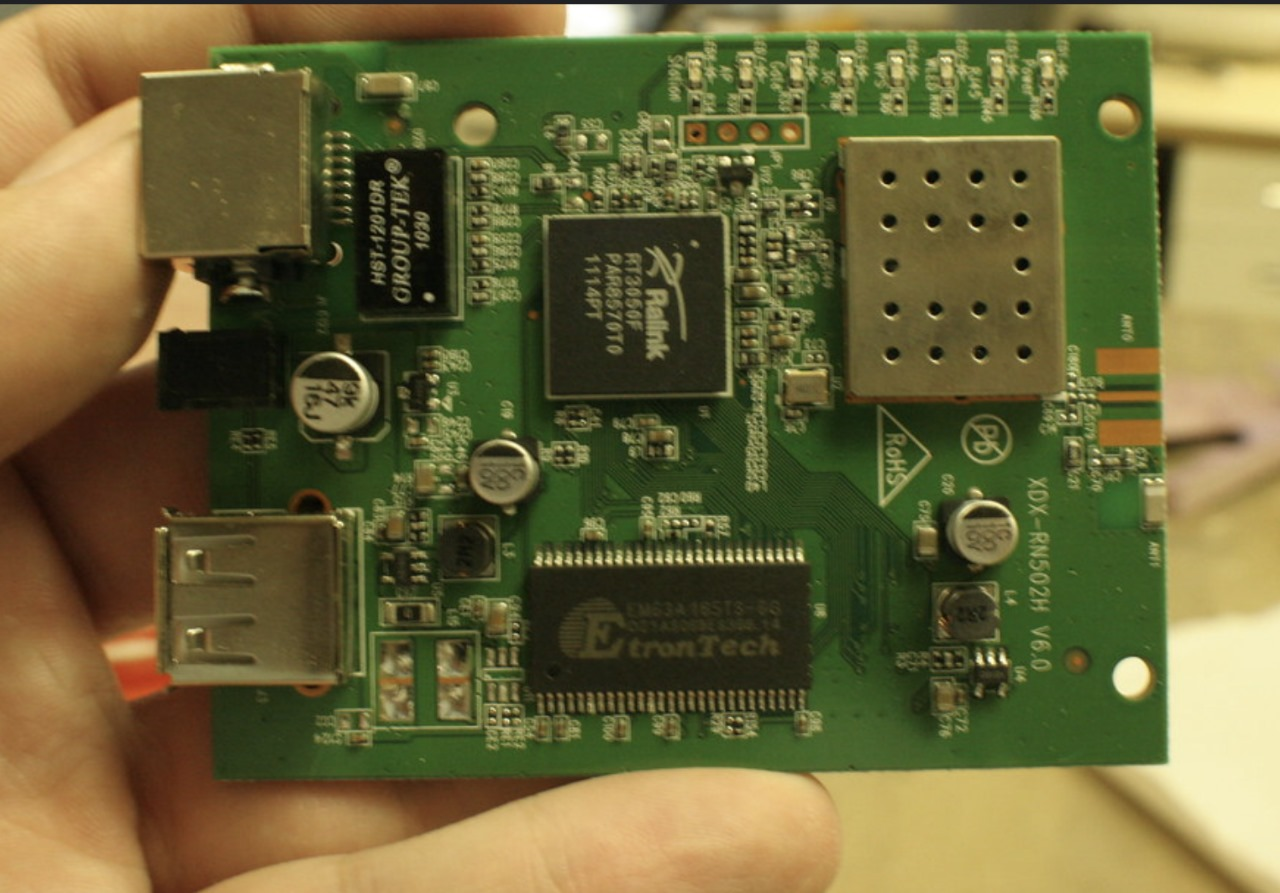

In [11]:
%cd {HOME}
Image(filename=f'/kaggle/input/sample-images/microcontroller.jpeg', width=600)

In [12]:
%cd {HOME}

!yolo task=detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics 8.3.153 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,768 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1331.5±325.1 MB/s, size: 40.8 KB)
val: Scanning /kaggle/working/datasets/CompDetect-23/valid/labels.cache... 76 im
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 51, len(boxes) = 1044. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
                   all 

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/input/sample-images/microcontroller.jpeg save=True

/kaggle/working
Ultralytics 8.3.153 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,768 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /kaggle/input/sample-images/microcontroller.jpeg: 448x608 6 ICs, 2 LEDs, 12 capacitors, 1 clock, 3 connectors, 14 resistors, 1 transistor, 34.0ms
Speed: 6.1ms preprocess, 34.0ms inference, 165.8ms postprocess per image at shape (1, 3, 448, 608)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [14]:
print("\nChecking for prediction results:")
!ls -la {HOME}/runs/detect/


Checking for prediction results:
total 20
drwxr-xr-x 5 root root 4096 Jun 11 10:11 .
drwxr-xr-x 3 root root 4096 Jun 11 10:01 ..
drwxr-xr-x 2 root root 4096 Jun 11 10:11 predict
drwxr-xr-x 3 root root 4096 Jun 11 10:11 train
drwxr-xr-x 2 root root 4096 Jun 11 10:11 val


In [15]:
%cd {HOME}
# More verbose prediction with explicit output directory
!yolo task=detect mode=predict \
    model=/kaggle/working/runs/detect/train/weights/best.pt \
    conf=0.25 \
    source=/kaggle/input/sample-images/microcontroller.jpeg \
    save=True \
    project=/kaggle/working/runs/detect \
    name=predict_test \
    exist_ok=True

/kaggle/working
Ultralytics 8.3.153 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,768 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /kaggle/input/sample-images/microcontroller.jpeg: 448x608 6 ICs, 2 LEDs, 12 capacitors, 1 clock, 3 connectors, 14 resistors, 1 transistor, 33.2ms
Speed: 6.0ms preprocess, 33.2ms inference, 170.9ms postprocess per image at shape (1, 3, 448, 608)
Results saved to /kaggle/working/runs/detect/predict_test
💡 Learn more at https://docs.ultralytics.com/modes/predict


Found image: /kaggle/working/runs/detect/predict_test/microcontroller.jpg


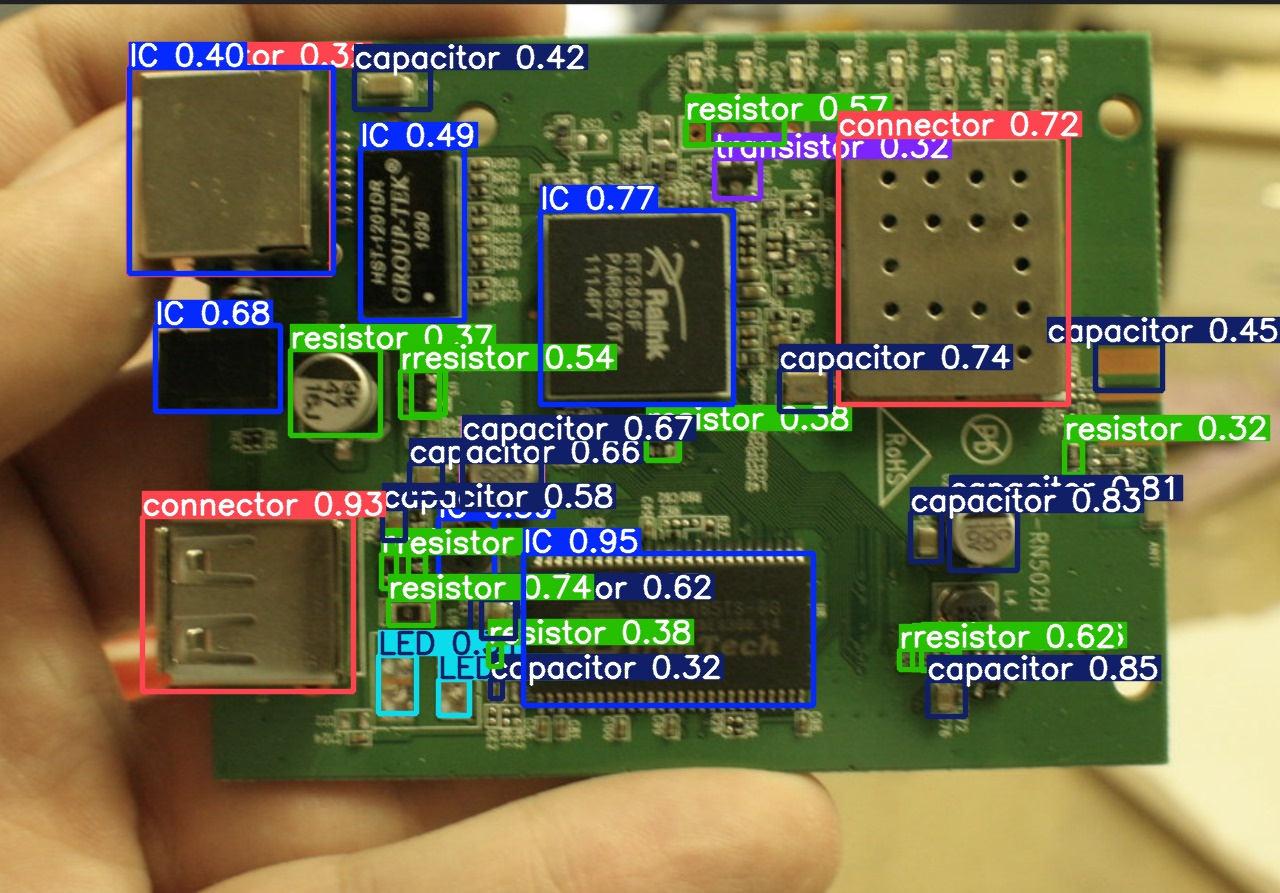

In [16]:
import glob
from IPython.display import Image, display

# Look in the correct directory (predict_test, not predict)
for image_path in glob.glob('/kaggle/working/runs/detect/predict_test/*.jpg'):
    print(f"Found image: {image_path}")
    display(Image(filename=image_path, width=600))

# Also try with .jpeg extension
for image_path in glob.glob('/kaggle/working/runs/detect/predict_test/*.jpeg'):
    print(f"Found image: {image_path}")
    display(Image(filename=image_path, width=600))

In [ ]:
!pip install -U -q "google"
!pip install -U -q "google.genai"
import os
os.environ["GEMINI_API_KEY"] = "GEMINI_API_KEY"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.0/200.0 kB 6.4 MB/s eta 0:00:00


In [ ]:
import os
from google import genai
from google.genai import types

# Set API key directly
os.environ["GEMINI_API_KEY"] = "GEMINI_API_KEY"

def generate():
    client = genai.Client(api_key=os.environ.get("GEMINI_API_KEY"))
    # Upload file
    files = [client.files.upload(file="/kaggle/working/runs/detect/predict_test/microcontroller.jpg")]
    # Create content
    contents = [
        types.Content(
            role="user",
            parts=[
                types.Part.from_uri(
                    file_uri=files[0].uri,
                    mime_type=files[0].mime_type,
                ),
                types.Part.from_text(text="""
                perform ocr on it and then do the following:
                  Analyze this PCB component image and identify:
                    1. What type of component this is (resistor, capacitor, IC, etc.)
                    2. Any markings or labels visible
                    3. Potential functionality or what kind of board is it
                    4. Estimated confidence level (0-100%)
                  and then do the following
                    1. Component recognition
                    2. Debugging interface detection
                    3. Hardware security assessment
                    provide the output in a structured format (without #, * and everything)
                """),
            ],
        )
    ]
    # Simple config
    config = types.GenerateContentConfig(
        response_modalities=["text"],
        response_mime_type="text/plain"
    )
    # Generate and print response
    response = client.models.generate_content(
        model="gemini-2.0-flash-exp",
        contents=contents,
        config=config
    )
    print(response.text)

if __name__ == "__main__":
    generate()

Here's an analysis of the provided PCB image, focusing on component identification, markings, potential functionality, and a basic security assessment:

Component Recognition:

    Capacitors: Numerous, various sizes.
    Resistors: Numerous, various sizes.
    ICs (Integrated Circuits): Several, including a labeled "Ralink" chip.
    Connectors: USB connector identified.
    LEDs: A couple of LEDs.
    Transistor: One identifiable transistor.

Markings/Labels:

    "Ralink RT3050F":  Likely a Wi-Fi or WLAN system-on-chip (SoC).
    "HST-1201DR GROUP-TEK 1030": Probably identifies the manufacturer and part number for another IC.
    "ANTS": Indicates the location of an antenna connection or related circuitry.
    "ROHS": Indicates compliance with the Restriction of Hazardous Substances directive.
    "TS-80 tech": Manufacturer markings on a chip.
    Various numerical codes and manufacturer logos on smaller components (resistors, capacitors).
    "RN502H": Likely a manufacturing or boa